In [5]:
from sklearn.cluster import KMeans
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [6]:

data = np.array([
    [240.0, 412.0, 703.0],
    [150.0, 440.0, 600.0],
    [62.0, 83.5, 294.0]
])


In [7]:


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [8]:

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

print("Cluster labels:", kmeans.labels_)


Cluster labels: [2 0 1]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [10]:
cosine_dist_matrix = squareform(pdist(data_scaled, 'cosine'))


Z = linkage(cosine_dist_matrix, 'average')



/var/folders/j6/fll5x1pn6cx824z6k5cxcmqm0000gn/T/ipykernel_13061/2041031373.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(cosine_dist_matrix, 'average')


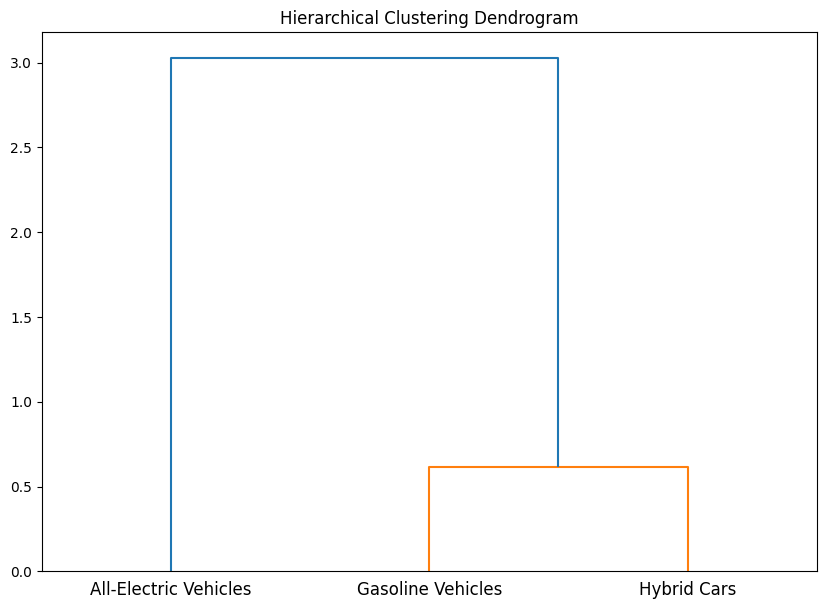

In [11]:

plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z, labels=['Gasoline Vehicles', 'Hybrid Cars', 'All-Electric Vehicles'])
plt.show()


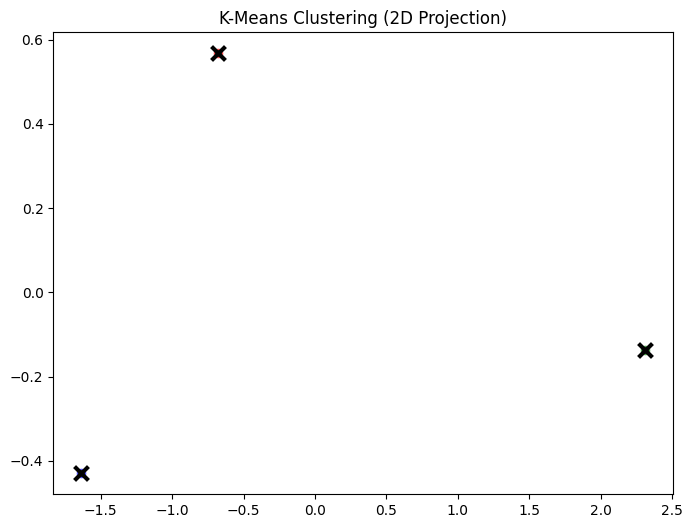

In [13]:

pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_scaled)

cluster_assignments = kmeans.labels_

plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for i in range(data_reduced.shape[0]):
    plt.scatter(data_reduced[i, 0], data_reduced[i, 1], color=colors[cluster_assignments[i]], alpha=0.5)
plt.title('K-Means Clustering (2D Projection)')


centroids_reduced = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], marker='x', s=100, linewidths=3, color='k')

plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


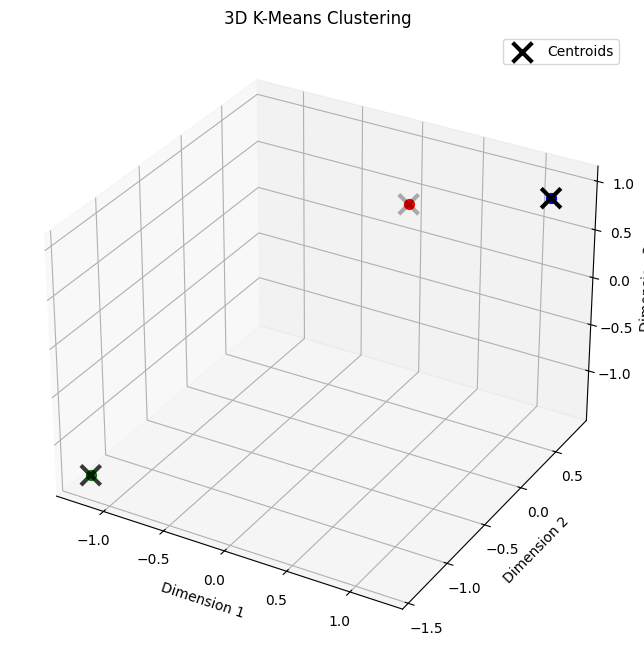

In [14]:


data = np.array([
    [240.0, 412.0, 703.0],
    [150.0, 440.0, 600.0],
    [62.0, 83.5, 294.0],
    
])


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

clusters = kmeans.labels_


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


colors = ['r', 'g', 'b']


for i in range(len(data_scaled)):
    ax.scatter(data_scaled[i][0], data_scaled[i][1], data_scaled[i][2], color=colors[clusters[i]], s=50)

centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', s=200, linewidths=3, color='k', label='Centroids')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title('3D K-Means Clustering')
ax.legend()

plt.show()


In [16]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(data_scaled)
labels = kmeans.labels_

silhouette_avg = silhouette_score(data_scaled, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.40


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:


silhouette_vals = silhouette_samples(data_scaled, clusters)
silhouette_avg = silhouette_score(data_scaled, clusters)

fig, ax = plt.subplots(figsize=(10, 8))
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(clusters)):
    cluster_silhouette_vals = silhouette_vals[clusters == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    color = plt.cm.jet(float(i) / len(np.unique(clusters)))
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, cluster_silhouette_vals,
                     facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10  

ax.set_title('Silhouette Plot')
ax.set_xlabel('Silhouette Coefficient Values')
ax.set_ylabel('Cluster Label')

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])  
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


Silhouette Score for k=2: 0.419
Silhouette Score for k=3: 0.310
Silhouette Score for k=4: 0.120


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


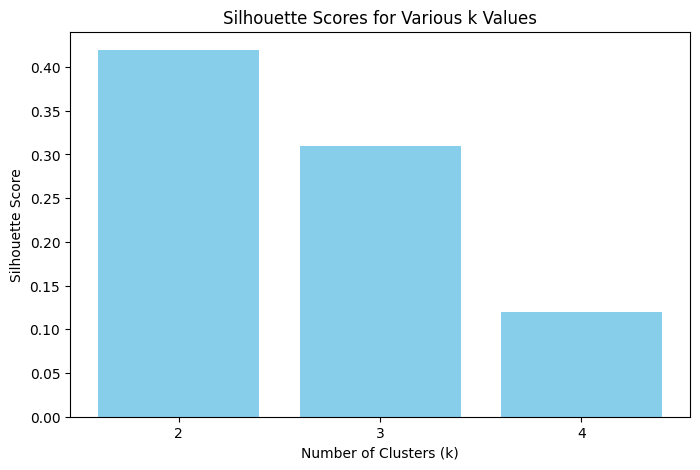

In [18]:



data = np.array([
    [240.0, 412.0, 703.0],
    [150.0, 440.0, 600.0],
    [62.0, 83.5, 294.0],
    [300.0, 500.0, 800.0],  
    [100.0, 300.0, 500.0]
])


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


k_values = [2, 3, 4]
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(data_scaled, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for k={k}: {silhouette_avg:.3f}")


plt.figure(figsize=(8, 5))
plt.bar(k_values, silhouette_scores, color='skyblue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Various k Values')
plt.xticks(k_values)
plt.show()
